In [8]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

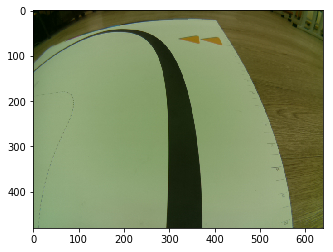

In [137]:
img = cv2.imread('1.jpg')
plt.imshow(img[:,:,::-1])

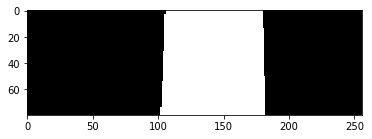

In [138]:
img_centerX = img.shape[1]//2
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
seeBelowY = gray.shape[0] - gray.shape[0]//6
window_width = gray.shape[1]//5
window_center = gray.shape[1]//2
roi = gray[seeBelowY:,window_center-window_width:window_center+window_width]
thresh, binary = cv2.threshold(roi, 1, 255, cv2.THRESH_OTSU)
binary_inv = np.zeros_like(binary)
binary_inv[binary==0] = 1
plt.imshow(binary_inv, cmap='gray')

In [139]:
thresh

90.0

In [140]:
nonzero = binary_inv.nonzero()
nonzerox = np.array(nonzero[1])
nonzerox

array([106, 107, 108, ..., 179, 180, 181])

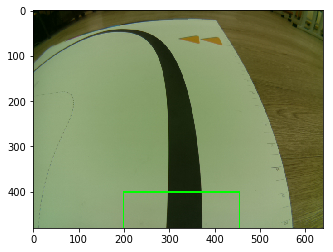

In [149]:
outImg = img.copy()
cv2.rectangle(outImg, (window_center-window_width, seeBelowY), (window_center+window_width, gray.shape[0]), (0,255,0), 2)
plt.imshow(outImg[:,:,::-1])

In [150]:
avgX = np.median(nonzerox)
avgX

142.0

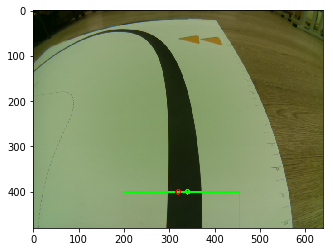

In [152]:
line_center = int(avgX)+window_center-window_width
cv2.circle(outImg, (line_center, seeBelowY), 5, (0,255,0),2)
cv2.circle(outImg, (img_centerX, seeBelowY), 5, (0,0,255),2)
plt.imshow(outImg[:,:,::-1])

In [153]:
if abs(window_center-line_center) > 10:
    window_center = int(0.5*line_center + 0.5*window_center)

In [154]:
cte = line_center - img_centerX
cte

21